### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# To suppress warnings
import warnings
warnings.filterwarnings('ignore')

#Changing settings to see maximum data 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Step 1:Data loading

In [2]:
#Reading the dataset
df=pd.read_csv('Downloads/Amazon Sale Report.csv')

## Step 2:Data Exploration

In [3]:
#Checking the first few rows of the data
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [4]:
#Checking the number of rows and columns of the dataset
df.shape

(128976, 21)

In [5]:
#Checking the datatype of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [6]:
#Checking the summary of the dataset
df.describe()

,index,Qty,Amount,ship-postal-code,New,PendingS
count,128976.000000,128976.000000,121176.000000,128941.000000,0.0,0.0
mean,64486.130427,0.904401,648.562176,463945.677744,NaN,NaN
std,37232.897832,0.313368,281.185041,191458.488954,NaN,NaN
min,0.000000,0.000000,0.000000,110001.000000,NaN,NaN
25%,32242.750000,1.000000,449.000000,382421.000000,NaN,NaN
50%,64486.500000,1.000000,605.000000,500033.000000,NaN,NaN
75%,96730.250000,1.000000,788.000000,600024.000000,NaN,NaN
max,128974.000000,15.000000,5584.000000,989898.000000,NaN,NaN


### Inference: The columns "Qty" and "Amount" have a significant difference between 75% and maximum value indicating presence of outliers.

## Step 3:Data Cleaning

In [7]:
#Checking percentage of missing/null values
round(100*df.isnull().mean(),2)

index                   0.00
Order ID                0.00
Date                    0.00
Status                  0.00
Fulfilment              0.00
Sales Channel           0.00
ship-service-level      0.00
Category                0.00
Size                    0.00
Courier Status          0.00
Qty                     0.00
currency                6.05
Amount                  6.05
ship-city               0.03
ship-state              0.03
ship-postal-code        0.03
ship-country            0.03
B2B                     0.00
fulfilled-by           69.56
New                   100.00
PendingS              100.00
dtype: float64

In [8]:
# Forming a list of columns for which the missing value % is more than 50%
high_null_cols = df.columns[100*(df.isnull().sum()/len(df)) > 50]
print(high_null_cols)

Index(['fulfilled-by', 'New', 'PendingS'], dtype='object')


In [9]:
# Dropping the columns that have more than 50% missing values

df = df.drop(high_null_cols, axis=1)

In [10]:
round(100*df.isnull().mean(),2)

index                 0.00
Order ID              0.00
Date                  0.00
Status                0.00
Fulfilment            0.00
Sales Channel         0.00
ship-service-level    0.00
Category              0.00
Size                  0.00
Courier Status        0.00
Qty                   0.00
currency              6.05
Amount                6.05
ship-city             0.03
ship-state            0.03
ship-postal-code      0.03
ship-country          0.03
B2B                   0.00
dtype: float64

In [11]:
df['Amount'] = df['Amount'].fillna(df['Amount'].mean()) 

In [12]:
print(df.columns)

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B'],
      dtype='object')


In [13]:
round(100*df.isnull().mean(),2)

index                 0.00
Order ID              0.00
Date                  0.00
Status                0.00
Fulfilment            0.00
Sales Channel         0.00
ship-service-level    0.00
Category              0.00
Size                  0.00
Courier Status        0.00
Qty                   0.00
currency              6.05
Amount                0.00
ship-city             0.03
ship-state            0.03
ship-postal-code      0.03
ship-country          0.03
B2B                   0.00
dtype: float64

### Column Segmentation into Categorical,Continuous and extra column.

In [14]:
cat_cols=["Date","Status","Fulfilment","ship-service-level","Category","Size","Courier Status","ship-city","ship-state","ship-postal-code","B2B"]
cont_cols=["Qty","Amount"]
extra_cols=["index","Order ID","Sales Channel","currency","ship-country"]

In [15]:
# drop extra column
df=df.drop(extra_cols,axis=1)

In [16]:
df.shape

(128976, 13)

In [17]:
df[cont_cols].isnull().mean()

Qty       0.0
Amount    0.0
dtype: float64

In [18]:
df[cat_cols].isnull().mean()

Date                  0.000000
Status                0.000000
Fulfilment            0.000000
ship-service-level    0.000000
Category              0.000000
Size                  0.000000
Courier Status        0.000000
ship-city             0.000271
ship-state            0.000271
ship-postal-code      0.000271
B2B                   0.000000
dtype: float64

## Step 4:Data Visualization

## Univariate Analysis

### Numerical columns

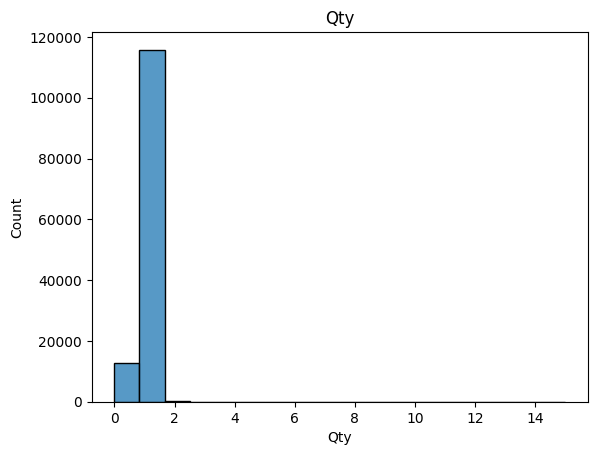

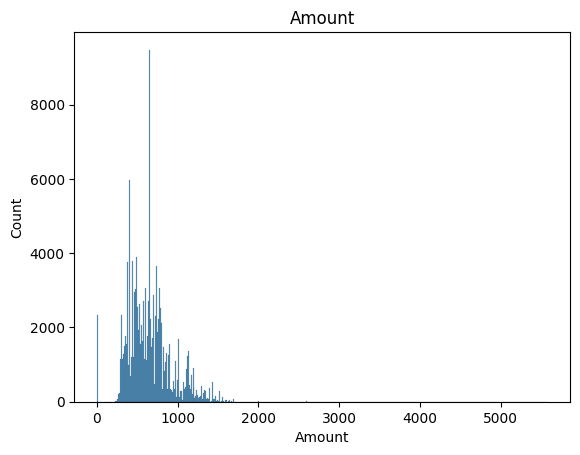

In [19]:
for col in cont_cols:
    sns.histplot(df[col])
    plt.title(col)
    plt.show()

## Bivariate Analysis

### 1. Sales Overview:

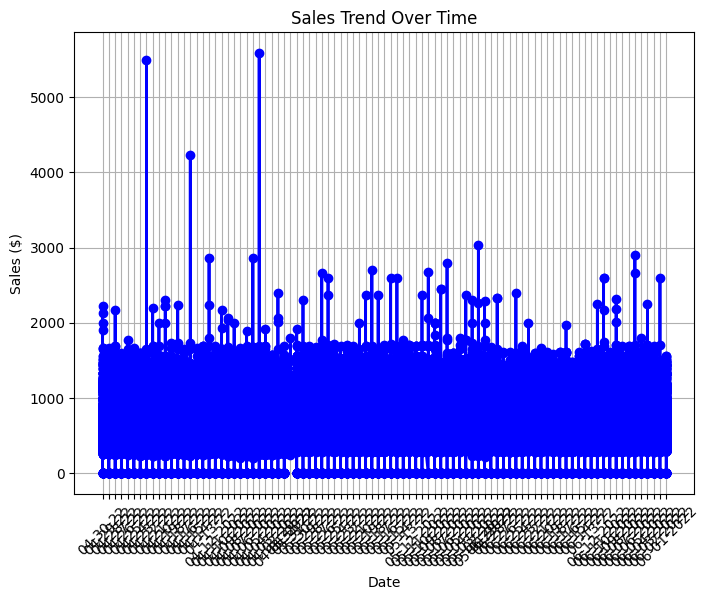

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(df['Date'], df['Amount'], marker='o', color='b', linestyle='-', linewidth=2)
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Insights:More sales happened in the date 05-04-2022 from the above analysis.

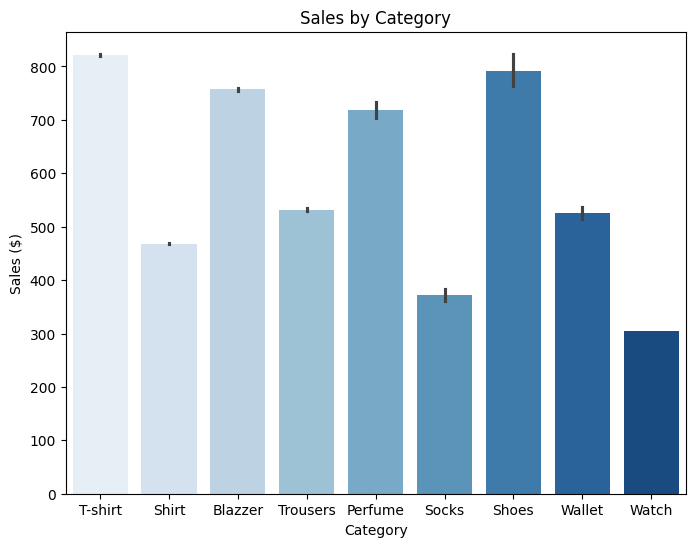

In [21]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Amount', data=df, palette='Blues')
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales ($)')
plt.show()

### Insights:The category with the highest sales is T-shirt.

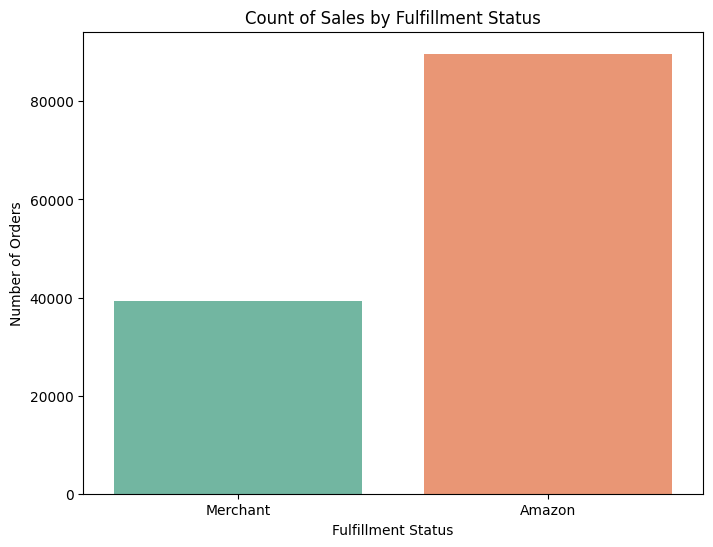

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Fulfilment', data=df, palette='Set2')
plt.title('Count of Sales by Fulfillment Status')
plt.xlabel('Fulfillment Status')
plt.ylabel('Number of Orders')
plt.show()

### Insights:Amazon has hightest number of orders than merchant.

### 2. Product Analysis:

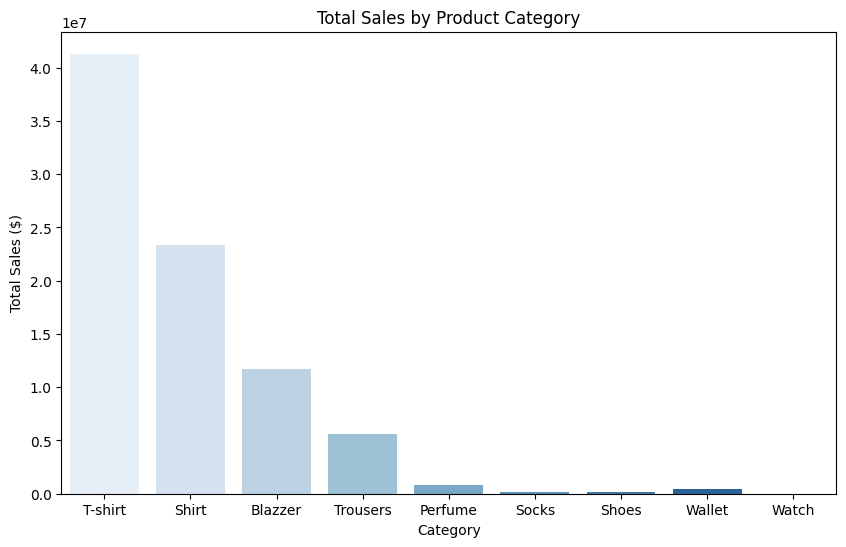

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Amount', data=df, estimator=sum, ci=None, palette='Blues')
plt.title('Total Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales ($)')
plt.show()

### Insights:maximum distribution of product is T-shirt

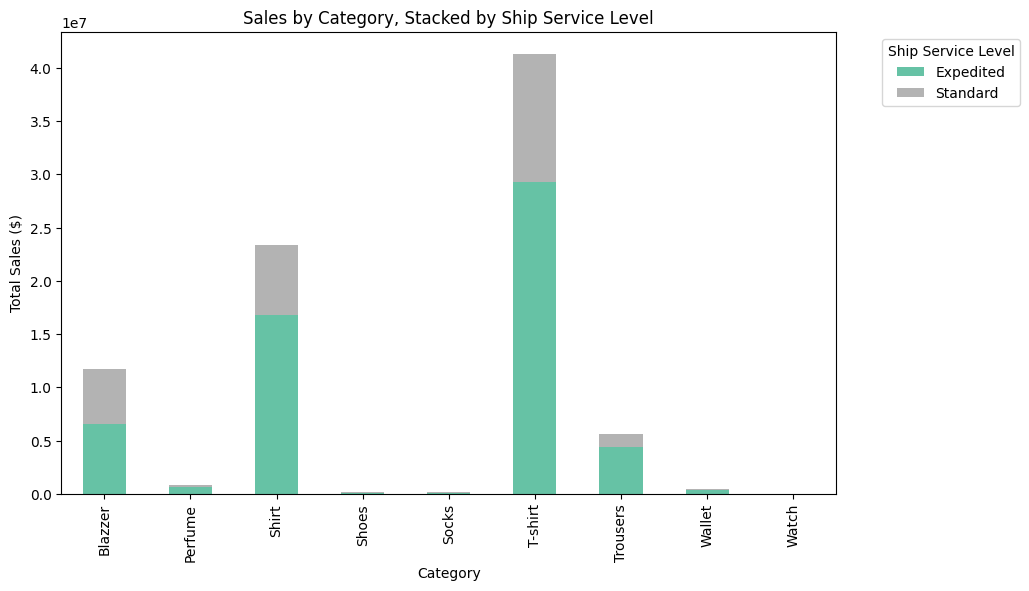

In [24]:
# Pivot table to aggregate sales by Category and Ship Service Level
df_pivot = df.pivot_table(values='Amount', index='Category', columns='ship-service-level', aggfunc='sum', fill_value=0)

# Stacked bar plot
df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Sales by Category, Stacked by Ship Service Level')
plt.xlabel('Category')
plt.ylabel('Total Sales ($)')
plt.legend(title='Ship Service Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Insights:Maximum sales occured in T-shirt in which most prefer fast delivery.(Expedited)

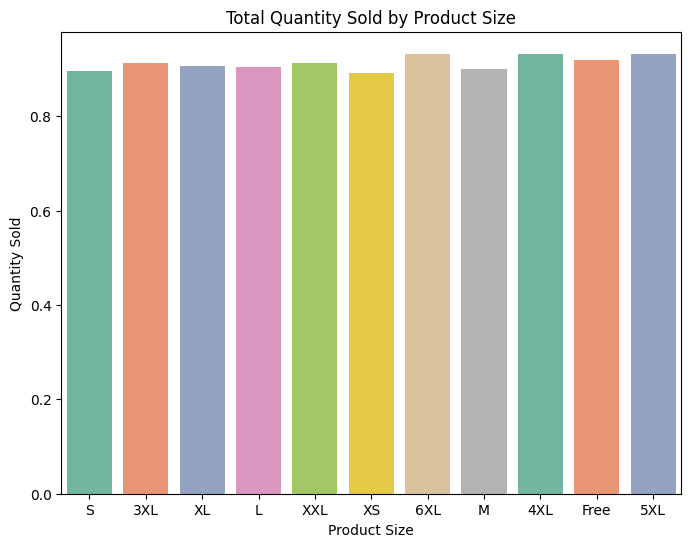

In [25]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Size', y='Qty', data=df, palette='Set2', ci=None)
plt.title('Total Quantity Sold by Product Size')
plt.xlabel('Product Size')
plt.ylabel('Quantity Sold')
plt.show()

### Insights:The Product size with the highest quantity sold was 6XL.

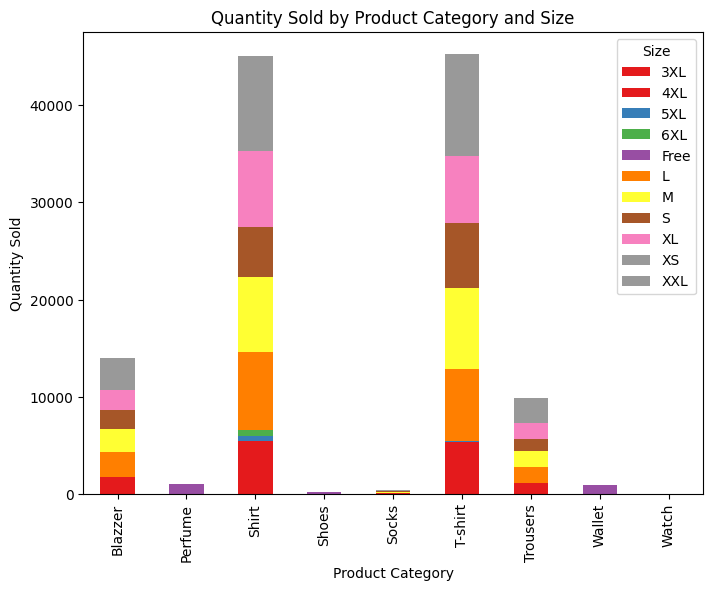

In [26]:
pivot_data = df.pivot_table(values='Qty', index='Category', columns='Size', aggfunc='sum', fill_value=0)

# Stacked bar plot
pivot_data.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set1')
plt.title('Quantity Sold by Product Category and Size')
plt.xlabel('Product Category')
plt.ylabel('Quantity Sold')
plt.show()

In [27]:
 # Group by category and size to find top products by quantity sold
top_products = df.groupby(['Category', 'Size']).agg({'Qty': 'sum'}).reset_index()

# Sort the data to find top-selling products
top_products = top_products.sort_values(by='Qty', ascending=False)

# Display top products
print(top_products)

    Category  Size   Qty
31   T-shirt     M  8362
12     Shirt     L  8049
15     Shirt    XL  7837
13     Shirt     M  7706
30   T-shirt     L  7396
17     Shirt   XXL  6946
33   T-shirt    XL  6874
32   T-shirt     S  6704
35   T-shirt   XXL  5604
26   T-shirt   3XL  5287
14     Shirt     S  5161
8      Shirt   3XL  5134
34   T-shirt    XS  4890
16     Shirt    XS  2787
1    Blazzer     L  2545
2    Blazzer     M  2327
4    Blazzer    XL  2126
3    Blazzer     S  1963
6    Blazzer   XXL  1945
0    Blazzer   3XL  1758
40  Trousers    XL  1735
38  Trousers     M  1693
42  Trousers   XXL  1687
37  Trousers     L  1648
5    Blazzer    XS  1279
39  Trousers     S  1146
36  Trousers   3XL  1121
7    Perfume  Free  1051
41  Trousers    XS   868
43    Wallet  Free   863
11     Shirt   6XL   616
10     Shirt   5XL   456
9      Shirt   4XL   352
18     Shoes  Free   153
29   T-shirt   6XL    72
20     Socks     L    68
22     Socks     S    67
25     Socks   XXL    64
23     Socks    XL    64


### 3. Fulfillment Analysis:

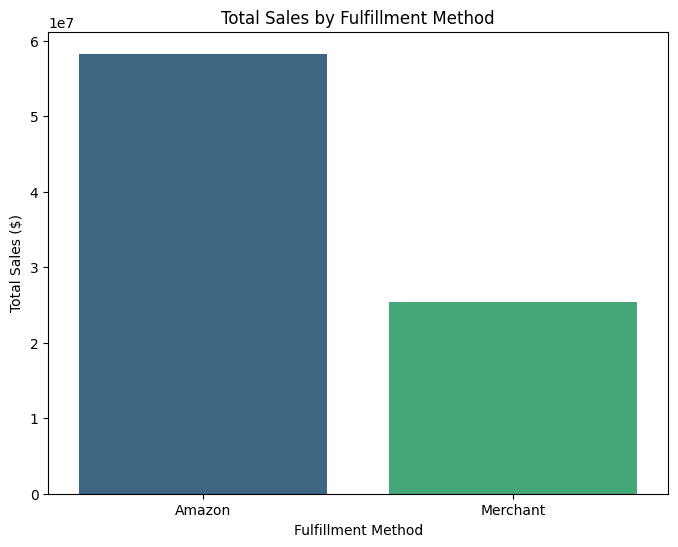

In [28]:
# Sum of Amount by Fulfillment Method
sales_by_fulfilment = df.groupby('Fulfilment')['Amount'].sum().reset_index()

# Plot sales by fulfillment method
plt.figure(figsize=(8, 6))
sns.barplot(x='Fulfilment', y='Amount', data=sales_by_fulfilment, palette='viridis')
plt.title('Total Sales by Fulfillment Method')
plt.xlabel('Fulfillment Method')
plt.ylabel('Total Sales ($)')
plt.show()

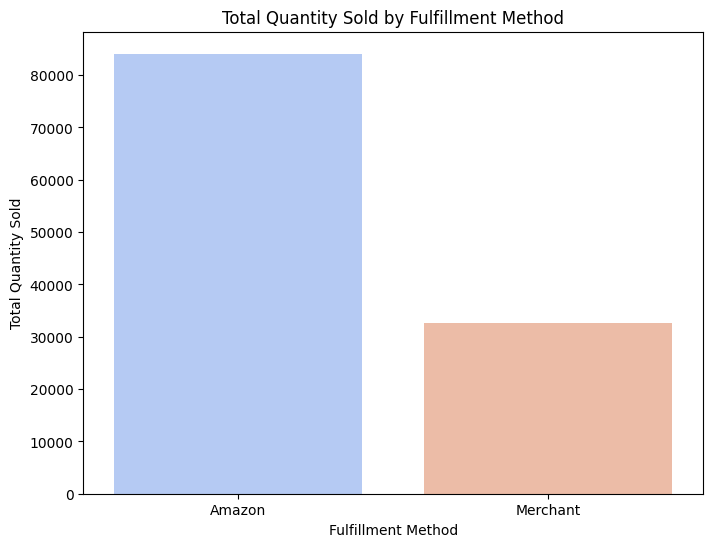

In [29]:
# Sum of Quantity by Fulfillment Method
quantity_by_fulfilment = df.groupby('Fulfilment')['Qty'].sum().reset_index()

# Plot quantity sold by fulfillment method
plt.figure(figsize=(8, 6))
sns.barplot(x='Fulfilment', y='Qty', data=quantity_by_fulfilment, palette='coolwarm')
plt.title('Total Quantity Sold by Fulfillment Method')
plt.xlabel('Fulfillment Method')
plt.ylabel('Total Quantity Sold')
plt.show()

### Insights:Most quantity sold in Amazon fulfilment method.

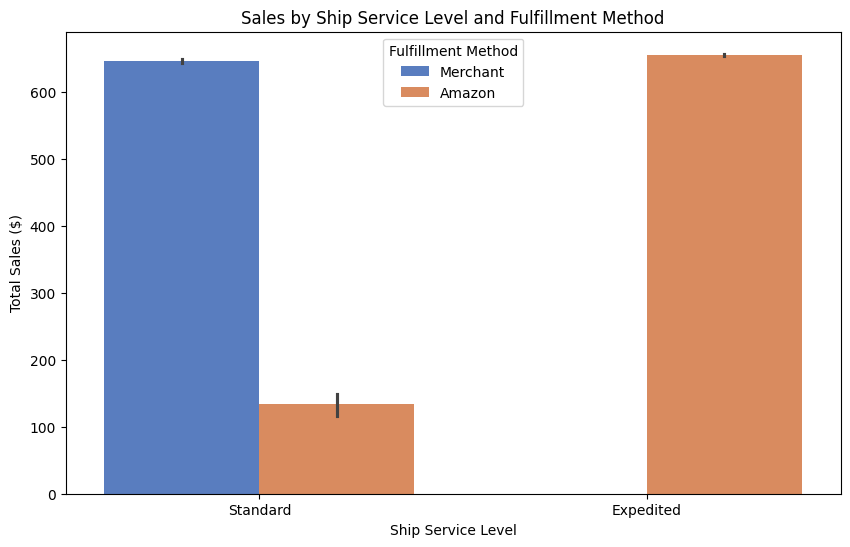

In [30]:
# Bar plot of sales by Ship Service Level and Fulfillment Method
plt.figure(figsize=(10, 6))
sns.barplot(x='ship-service-level', y='Amount', hue='Fulfilment', data=df, palette='muted')
plt.title('Sales by Ship Service Level and Fulfillment Method')
plt.xlabel('Ship Service Level')
plt.ylabel('Total Sales ($)')
plt.legend(title='Fulfillment Method')
plt.show()

### Insights-Most of the customers prefer fast delivery in amazon while other customer prefer mainly standard than expedited in merchant.

### 4. Customer Segmentation:

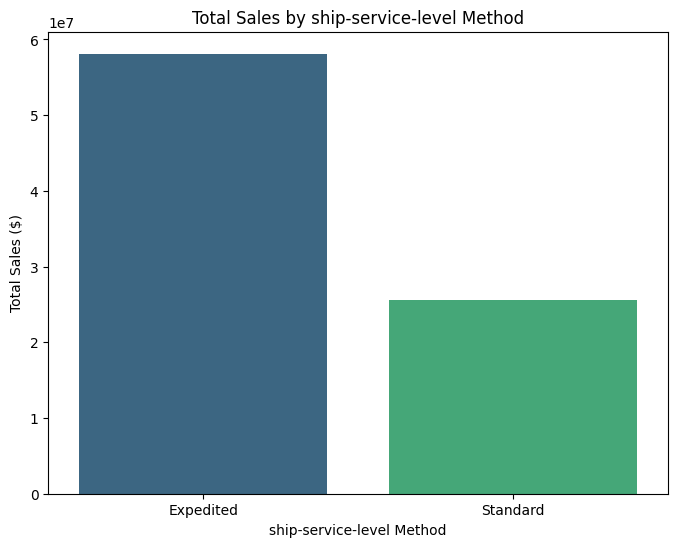

In [32]:
# Sum of Amount by ship-service-level Method
sales_by_fulfilment = df.groupby('ship-service-level')['Amount'].sum().reset_index()

# Plot sales by ship-service-level method
plt.figure(figsize=(8, 6))
sns.barplot(x='ship-service-level', y='Amount', data=sales_by_fulfilment, palette='viridis')
plt.title('Total Sales by ship-service-level Method')
plt.xlabel('ship-service-level Method')
plt.ylabel('Total Sales ($)')
plt.show()

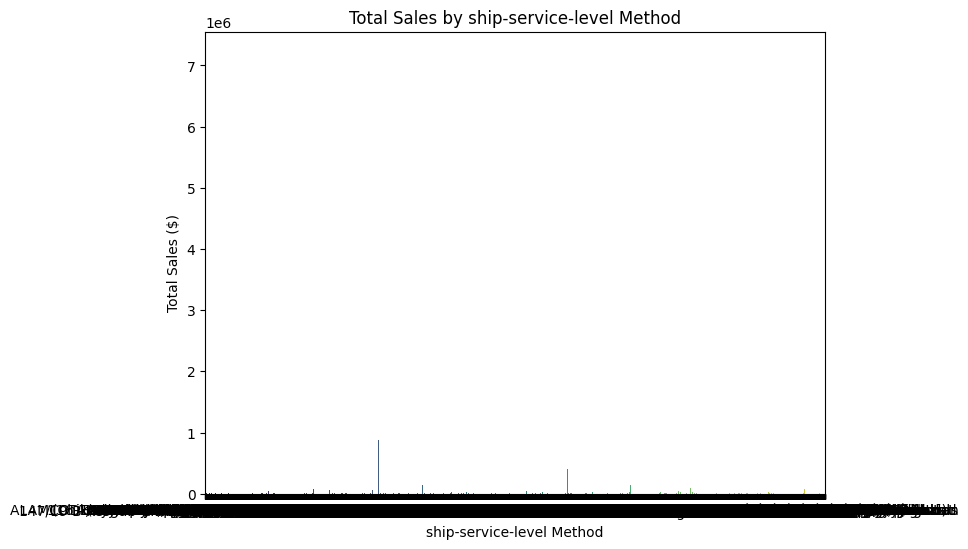

In [33]:
sales_by_fulfilment = df.groupby('ship-city')['Amount'].sum().reset_index()

# Plot sales by ship-service-level method
plt.figure(figsize=(8, 6))
sns.barplot(x='ship-city', y='Amount', data=sales_by_fulfilment, palette='viridis')
plt.title('Total Sales by ship-service-level Method')
plt.xlabel('ship-service-level Method')
plt.ylabel('Total Sales ($)')
plt.show()

### 5. Geographical Analysis:

In [39]:
# Group by state to find total sales by state
top_sales_state = df.groupby('ship-state').agg({'Amount': 'sum'}).reset_index()

# Sort the data to find top state by sales
top_sales_state = top_sales_state.sort_values(by='Amount', ascending=False)

# Display top state
print(top_sales_state)

                ship-state        Amount
28             MAHARASHTRA  1.411082e+07
23               KARNATAKA  1.108645e+07
57               TELANGANA  7.365120e+06
59           UTTAR PRADESH  7.271455e+06
56              TAMIL NADU  6.956962e+06
14                   DELHI  4.485678e+06
24                  KERALA  4.105036e+06
61             WEST BENGAL  3.777015e+06
1           ANDHRA PRADESH  3.461071e+06
19                 HARYANA  3.026931e+06
18                 Gujarat  2.944183e+06
49               RAJASTHAN  1.835271e+06
27          MADHYA PRADESH  1.699521e+06
8                    BIHAR  1.490589e+06
39                  ODISHA  1.462926e+06
44                  PUNJAB  1.251590e+06
5                    ASSAM  1.093239e+06
60             UTTARAKHAND  1.044470e+06
22               JHARKHAND  9.876237e+05
16                     GOA  6.547982e+05
11            CHHATTISGARH  5.987771e+05
20        HIMACHAL PRADESH  5.453315e+05
21         JAMMU & KASHMIR  4.913240e+05
29              

In [40]:
# Group by state to find total sales by city
top_sales_city = df.groupby('ship-city').agg({'Amount': 'sum'}).reset_index()

# Sort the data to find top city by sales
top_sales_city = top_sales_city.sort_values(by='Amount', ascending=False)

# Display top city
print(top_sales_city)

                                              ship-city        Amount
775                                           BENGALURU  7.191074e+06
2904                                          HYDERABAD  5.250570e+06
4793                                             MUMBAI  3.870469e+06
5391                                          NEW DELHI  3.836915e+06
1464                                            CHENNAI  3.292147e+06
6156                                               PUNE  2.471724e+06
3710                                            KOLKATA  1.502457e+06
2618                                           GURUGRAM  1.275691e+06
7583                                              THANE  1.065468e+06
4395                                            LUCKNOW  1.005527e+06
5469                                              NOIDA  9.611861e+05
2501                                          GHAZIABAD  8.822418e+05
5351                                        NAVI MUMBAI  8.060732e+05
53                  